# Import Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from warnings import filterwarnings
filterwarnings("ignore")

from aquarel import load_theme

theme = load_theme("boxy_light")
theme.apply()

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score

# Load Data

In [74]:
data1 = pd.read_csv("cleaned/train_cleaned.csv")
test = pd.read_csv("cleaned/test_cleaned.csv")

# Encode Class

In [75]:
data_cleaner = [data1, test]

In [76]:
lc = LabelEncoder()
lc = lc.fit(data1['Credit_Score'])

for dataset in data_cleaner:
    dataset['Credit_Score'] = lc.transform(dataset['Credit_Score'])

# Train, Validation, Test data

In [77]:
X = data1.drop(columns=['Credit_Score']).values
y = data1['Credit_Score'].values

X_test = test.drop(columns=['Credit_Score']).values
y_test = test['Credit_Score'].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(102180, 36) (102180,)
(25545, 36) (25545,)
(20000, 36) (20000,)


# Modeling

## Machine Learning (Baseline)

In [78]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Deep Learning

In [79]:
print(X_train.shape)
print(f"Input shape: {X_train.shape[1]}")

(102180, 36)
Input shape: 36


In [98]:
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(3, activation='softmax')
])

model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),   # Input layer (36) + 1st hidden layer (64)
    BatchNormalization(),
    Dropout(0.5),

    Dense(32, activation='relu'),                               # 2nd hidden layer (32)
    BatchNormalization(),
    Dropout(0.5),

    Dense(16, activation='relu'),                               # 3rd hidden layer (16)
    BatchNormalization(),
    Dropout(0.5),

    Dense(8, activation='relu'),                                # 4th hidden layer (8)
    BatchNormalization(),
    Dropout(0.5),

    Dense(4, activation='relu'),                                # 5th hidden layer (4)
    BatchNormalization(),

    Dense(3, activation='softmax')                              # Output layer for 3 classes
])

model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 64)             │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,659 (22.11 KB)

 Trainable params: 5,411 (21.14 KB)

 Non-trainable params: 248 (992.00 B)

In [99]:
try:
    model.load_weights('model.keras')
except:
    print("No weights found")

### No need to run if weights are already loaded

In [89]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [90]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping])

Epoch 1/100
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.3965 - loss: 1.1043 - val_accuracy: 0.6396 - val_loss: 0.8456
Epoch 2/100
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5953 - loss: 0.8924 - val_accuracy: 0.6868 - val_loss: 0.7850
Epoch 3/100
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6345 - loss: 0.8528 - val_accuracy: 0.6922 - val_loss: 0.7770
Epoch 4/100
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6434 - loss: 0.8364 - val_accuracy: 0.6929 - val_loss: 0.7706
Epoch 5/100
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6489 - loss: 0.8327 - val_accuracy: 0.6954 - val_loss: 0.7673
Epoch 6/100
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6519 - loss: 0.8299 - val_accuracy: 0.6977 - val_loss: 0.7660
Epoch 7/100
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6578 - loss: 0.8238 - val_accuracy: 0.7014 - val_loss: 0.7603
Epoch 8/100
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6595 - los

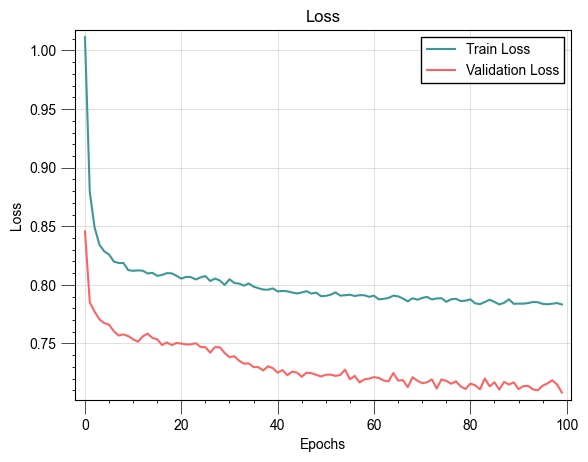

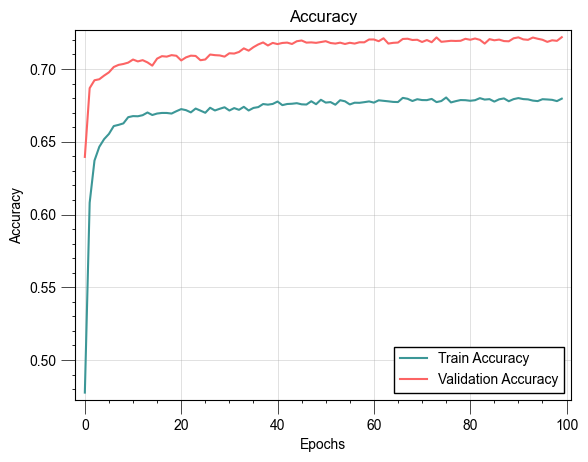

In [91]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [93]:
model.save('model.keras')

# Basline vs Deep Learning

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


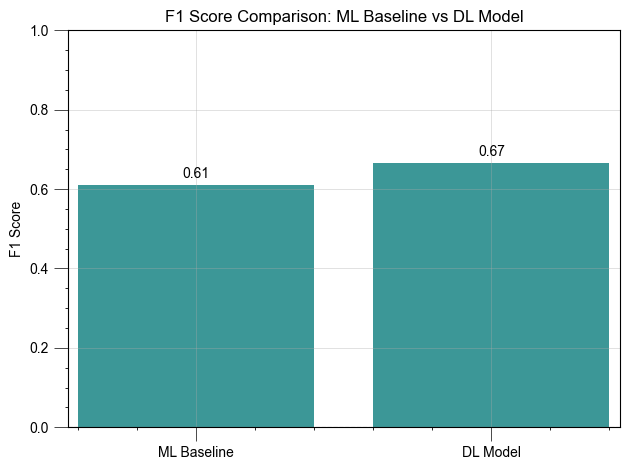

In [100]:
predictions_ml = logreg.predict(X_test)

predictions_dl = model.predict(X_test)
predictions_dl = np.argmax(predictions_dl, axis=1)

f1_ml = f1_score(y_test, predictions_ml, average='weighted')
f1_dl = f1_score(y_test, predictions_dl, average='weighted')

labels = ['ML Baseline', 'DL Model']
f1_scores = [f1_ml, f1_dl]

plt.bar(labels, f1_scores)

plt.ylabel('F1 Score')
plt.title('F1 Score Comparison: ML Baseline vs DL Model')

for i, score in enumerate(f1_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center', va='bottom')

plt.ylim(0, 1)  # F1 scores range from 0 to 1
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

# Deep Learning Model Evaluation

In [101]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy:  0.66395


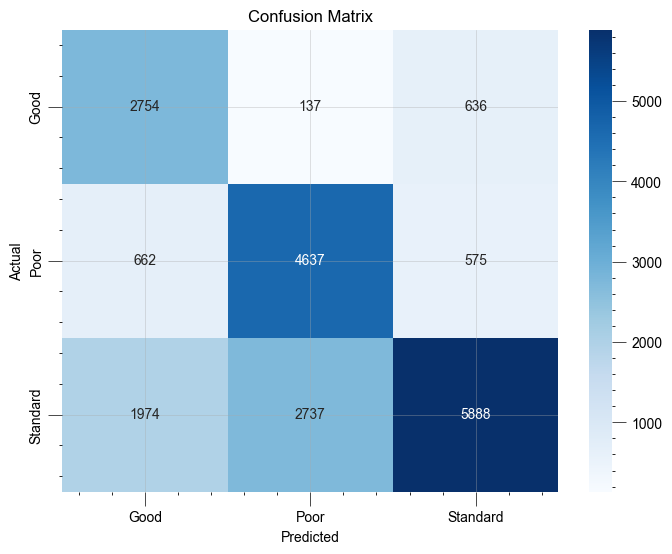

Classification Report:
               precision    recall  f1-score   support

        Good       0.51      0.78      0.62      3527
        Poor       0.62      0.79      0.69      5874
    Standard       0.83      0.56      0.67     10599

    accuracy                           0.66     20000
   macro avg       0.65      0.71      0.66     20000
weighted avg       0.71      0.66      0.67     20000

F1 Score (Macro): 0.6586492005250436
F1 Score (Weighted): 0.6650465456721933
Precision (Macro): 0.6525733311838618
Recall (Macro): 0.7085895464073015


In [102]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=lc.classes_, yticklabels=lc.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred, target_names=lc.classes_))

f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Macro): {f1_macro}")
print(f"F1 Score (Weighted): {f1_weighted}")

precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
print(f"Precision (Macro): {precision}")
print(f"Recall (Macro): {recall}")